In [288]:
import pandas as pd
import numpy as np

In [228]:
df_data=pd.read_csv("./Data_Processed_All_Contractors_Characteristics - Data.csv")

In [229]:
df_data.head()

,Dealer ID,year,train_test,Converted State-AL,Converted State-AR,Converted State-CA,Converted State-FL,Converted State-GA,Converted State-IL,Converted State-IN,...,2018_winter,2018_other,2019_summer,2019_winter,2019_other,Recency,applied_in_window_12months_or_not,applied_in_window_6months_or_not,applied_in_window_3months_or_not,applied_in_window_18months_or_not
0,C15306,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,316.3,1,0,0,1
1,C15309,2016,1,0,0,0,1,0,0,0,...,0,0,0,0,0,NaN,0,0,0,0
2,C15310,2016,0,0,0,0,0,0,1,0,...,0,0,0,0,0,NaN,0,0,0,0
3,C15311,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3.4,1,1,1,1
4,C15312,2016,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1143.5,0,0,0,0


In [230]:
df_data.columns

Index(['Dealer ID', 'year', 'train_test', 'Converted State-AL',
       'Converted State-AR', 'Converted State-CA', 'Converted State-FL',
       'Converted State-GA', 'Converted State-IL', 'Converted State-IN',
       'Converted State-KY', 'Converted State-LA', 'Converted State-MI',
       'Converted State-MO', 'Converted State-NC', 'Converted State-NJ',
       'Converted State-OH', 'Converted State-Others', 'Converted State-PA',
       'Converted State-SC', 'Converted State-TN', 'Converted State-TX',
       'employeebucket-NA', 'employeebucket-4~8', 'employeebucket-<4',
       'employeebucket->8', 'No. of Employees', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Gibson 18.Column3', 'Hitting Potential 16.Column3',
       'JS 16.Column3', 'JS 17

# 2016 Random Forest

In [273]:
df_2016=df_data.loc[df_data['year'] == 2016]
df_2016=df_2016[['Dealer ID', 'year', 'train_test', 'Converted State-AL',
       'Converted State-AR', 'Converted State-CA', 'Converted State-FL',
       'Converted State-GA', 'Converted State-IL', 'Converted State-IN',
       'Converted State-KY', 'Converted State-LA', 'Converted State-MI',
       'Converted State-MO', 'Converted State-NC', 'Converted State-NJ',
       'Converted State-OH', 'Converted State-Others', 'Converted State-PA',
       'Converted State-SC', 'Converted State-TN', 'Converted State-TX',
       'employeebucket-NA', 'employeebucket-4~8', 'employeebucket-<4',
       'employeebucket->8', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'JS 17.Column3',  'NON USER 17.Column3', 
       'Velocity 17.Column3',  'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'applied 2017']]

In [275]:
x_train=df_2016.loc[df_2016["train_test"]==1].drop(['Dealer ID', 'year', 'train_test', "applied 2017"],axis=1)
y_train=df_2016.loc[df_2016["train_test"]==1]["applied 2017"]
x_test=df_2016.loc[df_2016["train_test"]==0].drop(['Dealer ID', 'year', 'train_test', "applied 2017"],axis=1)
y_test=df_2016.loc[df_2016["train_test"]==0]["applied 2017"]

In [276]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
rf = RandomForestClassifier()
clf=rf.fit(x_train,y_train)
pred=clf.predict(x_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [278]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

In [279]:
actual=y_test
predicted=pred

In [280]:
Matrix=confusion_matrix(actual,predicted)
df_matrix=pd.DataFrame(Matrix,columns=['pred_0','pred_1'],index=['actual_0','actual_1'])
df_matrix

,pred_0,pred_1
actual_0,102,64
actual_1,66,63


In [282]:
tn, fp, fn, tp=Matrix.ravel()
acc=(tp+tn)/(tp+tn+fp+fn)
ppv=tp/(tp+fp)
npv=tn/(tn+fn)
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
summary_matrix=(acc,ppv,npv,tpr,tnr)
df_summary=pd.DataFrame(summary_matrix,columns=['Value'],index=['Accuracy','PPV','NPV','Sensitivity','Specificity'])
df_summary

,Value
Accuracy,0.559322
PPV,0.496063
NPV,0.607143
Sensitivity,0.488372
Specificity,0.614458


In [283]:
contractor_id=df_2016.loc[df_2016["train_test"]==0]["Dealer ID"]
predicted_prob=clf.predict_proba(x_test)
predicted_prob=[i[1] for i in predicted_prob]
df_result_3=pd.DataFrame()
df_result_3["contractor_id"]=contractor_id
df_result_3["actual"]=actual
df_result_3["predicted"]=predicted
df_result_3["predicted_prob"]=predicted_prob

In [284]:
def TP(columna,columnb):
    if columna==1 and columnb==1:
        x=1
    else:
        x=0
    return x

In [285]:
df_result_3=df_result.sort_values(by=["predicted_prob"],ascending=False)
df_result_3["Actual_Positive"]=df_result.apply(lambda x: TP(x["actual"],x["predicted"]),axis=1)
df_result_3["Cumulative_Positives"]=df_result["Actual_Positive"].cumsum()
total_positives=df_result_3["Actual_Positive"].sum()
df_result_3["Cumulative_Positives_percent"]=df_result["Cumulative_Positives"]/total_positives
df_result_3["Cumulative_Count"]=df_result["contractor_id"].expanding().count()/df_result["contractor_id"].count()

In [286]:
df_result_3

,contractor_id,actual,predicted,predicted_prob,Actual_Positive,Cumulative_Positives,Cumulative_Positives_percent,Cumulative_Count
1479,C16877,1,1,1.000000,1,1,0.015385,0.004049
1997,C17440,1,1,1.000000,1,3,0.046154,0.012146
1667,C17095,1,1,1.000000,1,4,0.061538,0.016194
1905,C17342,1,1,1.000000,1,5,0.076923,0.020243
1504,C16915,0,1,1.000000,0,5,0.076923,0.024291
2116,C17552,1,1,1.000000,1,2,0.030769,0.008097
1924,C17361,0,1,0.950000,0,5,0.076923,0.028340
1508,C16919,1,1,0.950000,1,6,0.092308,0.032389
1724,C17168,1,1,0.950000,1,7,0.107692,0.036437
2169,C17611,1,1,0.900000,1,11,0.169231,0.056680


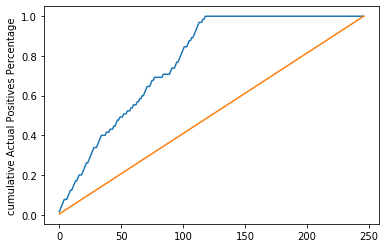

In [287]:
import matplotlib.pyplot as plt
plt.plot(df_result["Cumulative_Positives_percent"].values.tolist())
plt.plot(df_result["Cumulative_Count"].values.tolist())
plt.ylabel('cumulative Actual Positives Percentage')

plt.show()

# 2017 Random Forest

In [231]:
df_2017=df_data.loc[df_data['year'] == 2017]
df_2017=df_2017[['Dealer ID', 'year', 'train_test', 'Converted State-AL',
       'Converted State-AR', 'Converted State-CA', 'Converted State-FL',
       'Converted State-GA', 'Converted State-IL', 'Converted State-IN',
       'Converted State-KY', 'Converted State-LA', 'Converted State-MI',
       'Converted State-MO', 'Converted State-NC', 'Converted State-NJ',
       'Converted State-OH', 'Converted State-Others', 'Converted State-PA',
       'Converted State-SC', 'Converted State-TN', 'Converted State-TX',
       'employeebucket-NA', 'employeebucket-4~8', 'employeebucket-<4',
       'employeebucket->8', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'JS 17.Column3',  'NON USER 17.Column3', 
       'Velocity 17.Column3',  'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'applied 2017']]

In [232]:
x_train=df_2017.loc[df_2017["train_test"]==1].drop(['Dealer ID', 'year', 'train_test', "applied 2017"],axis=1)
y_train=df_2017.loc[df_2017["train_test"]==1]["applied 2017"]
x_test=df_2017.loc[df_2017["train_test"]==0].drop(['Dealer ID', 'year', 'train_test', "applied 2017"],axis=1)
y_test=df_2017.loc[df_2017["train_test"]==0]["applied 2017"]

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
rf = RandomForestClassifier()
clf=rf.fit(x_train,y_train)
pred=clf.predict(x_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [235]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

In [236]:
actual=y_test
predicted=pred

In [237]:
Matrix=confusion_matrix(actual,predicted)
df_matrix=pd.DataFrame(Matrix,columns=['pred_0','pred_1'],index=['actual_0','actual_1'])
df_matrix

,pred_0,pred_1
actual_0,71,55
actual_1,56,65


In [238]:
tn, fp, fn, tp=Matrix.ravel()
(tn, fp, fn, tp)

(71, 55, 56, 65)

In [239]:
acc=(tp+tn)/(tp+tn+fp+fn)
acc

0.5506072874493927

In [240]:
ppv=tp/(tp+fp)
ppv

0.5416666666666666

In [241]:
#sklearn
precision_score(actual,predicted)

0.5416666666666666

In [242]:
npv=tn/(tn+fn)
npv

0.5590551181102362

In [243]:
tpr=tp/(tp+fn)
tpr

0.5371900826446281

In [244]:
tnr=tn/(tn+fp)
tnr

0.5634920634920635

In [245]:
summary_matrix=(acc,ppv,npv,tpr,tnr)
summary_matrix

(0.5506072874493927,
 0.5416666666666666,
 0.5590551181102362,
 0.5371900826446281,
 0.5634920634920635)

In [246]:
df_summary=pd.DataFrame(summary_matrix,columns=['Value'],index=['Accuracy','PPV','NPV','Sensitivity','Specificity'])
df_summary

,Value
Accuracy,0.550607
PPV,0.541667
NPV,0.559055
Sensitivity,0.537190
Specificity,0.563492


In [247]:
contractor_id=df_2017.loc[df_2017["train_test"]==0]["Dealer ID"]
predicted_prob=clf.predict_proba(x_test)
predicted_prob=[i[1] for i in predicted_prob]

In [248]:
df_result=pd.DataFrame()
df_result["contractor_id"]=contractor_id
df_result["actual"]=actual
df_result["predicted"]=predicted
df_result["predicted_prob"]=predicted_prob

In [249]:
def TP(columna,columnb):
    if columna==1 and columnb==1:
        x=1
    else:
        x=0
    return x

In [250]:
df_result=df_result.sort_values(by=["predicted_prob"],ascending=False)
df_result["Actual_Positive"]=df_result.apply(lambda x: TP(x["actual"],x["predicted"]),axis=1)
df_result["Cumulative_Positives"]=df_result["Actual_Positive"].cumsum()
total_positives=df_result["Actual_Positive"].sum()
df_result["Cumulative_Positives_percent"]=df_result["Cumulative_Positives"]/total_positives
df_result["Cumulative_Count"]=df_result["contractor_id"].expanding().count()/df_result["contractor_id"].count()

In [251]:
df_result.head()

,contractor_id,actual,predicted,predicted_prob,Actual_Positive,Cumulative_Positives,Cumulative_Positives_percent,Cumulative_Count
1479,C16877,1,1,1.0,1,1,0.015385,0.004049
2116,C17552,1,1,1.0,1,2,0.030769,0.008097
1997,C17440,1,1,1.0,1,3,0.046154,0.012146
1667,C17095,1,1,1.0,1,4,0.061538,0.016194
1905,C17342,1,1,1.0,1,5,0.076923,0.020243


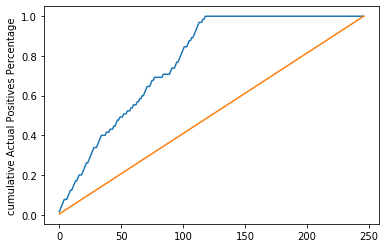

In [252]:
import matplotlib.pyplot as plt
plt.plot(df_result["Cumulative_Positives_percent"].values.tolist())
plt.plot(df_result["Cumulative_Count"].values.tolist())
plt.ylabel('cumulative Actual Positives Percentage')

plt.show()

# Window Function 1 year

In [253]:
df_window_1year=df_data.loc[df_data['applied_in_window_12months_or_not'] != 'Not enough info']

In [254]:
df_window_1year=df_window_1year[['Dealer ID', 'year', 'train_test', 'Converted State-AL',
       'Converted State-AR', 'Converted State-CA', 'Converted State-FL',
       'Converted State-GA', 'Converted State-IL', 'Converted State-IN',
       'Converted State-KY', 'Converted State-LA', 'Converted State-MI',
       'Converted State-MO', 'Converted State-NC', 'Converted State-NJ',
       'Converted State-OH', 'Converted State-Others', 'Converted State-PA',
       'Converted State-SC', 'Converted State-TN', 'Converted State-TX',
       'employeebucket-NA', 'employeebucket-4~8', 'employeebucket-<4',
       'employeebucket->8',  'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'brand_1', 'brand_2','brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'applied_in_window_12months_or_not']]

In [255]:
x_train=df_window_1year.loc[df_window_1year["train_test"]==1].drop(['Dealer ID', 'year', 'train_test', "applied_in_window_12months_or_not"],axis=1)
y_train=df_window_1year.loc[df_window_1year["train_test"]==1]["applied_in_window_12months_or_not"]
x_test=df_window_1year.loc[df_window_1year["train_test"]==0].drop(['Dealer ID', 'year', 'train_test', "applied_in_window_12months_or_not"],axis=1)
y_test=df_window_1year.loc[df_window_1year["train_test"]==0]["applied_in_window_12months_or_not"]

In [256]:
rf = RandomForestClassifier()
clf=rf.fit(x_train,y_train)
pred=clf.predict(x_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [257]:
actual=y_test
predicted=pred

In [258]:
Matrix=confusion_matrix(actual,predicted)
df_matrix=pd.DataFrame(Matrix,columns=['pred_0','pred_1'],index=['actual_0','actual_1'])
df_matrix

,pred_0,pred_1
actual_0,120,176
actual_1,145,328


In [259]:
tn, fp, fn, tp=Matrix.ravel()
(tn, fp, fn, tp)

(120, 176, 145, 328)

In [260]:
acc=(tp+tn)/(tp+tn+fp+fn)
acc

0.5825747724317295

In [261]:
ppv=tp/(tp+fp)
ppv

0.6507936507936508

In [262]:
npv=tn/(tn+fn)
npv

0.4528301886792453

In [263]:
tpr=tp/(tp+fn)
tpr

0.693446088794926

In [264]:
tnr=tn/(tn+fp)
tnr

0.40540540540540543

In [265]:
summary_matrix=(acc,ppv,npv,tpr,tnr)
summary_matrix

(0.5825747724317295,
 0.6507936507936508,
 0.4528301886792453,
 0.693446088794926,
 0.40540540540540543)

In [266]:
df_summary=pd.DataFrame(summary_matrix,columns=['Value'],index=['Accuracy','PPV','NPV','Sensitivity','Specificity'])
df_summary

,Value
Accuracy,0.582575
PPV,0.650794
NPV,0.452830
Sensitivity,0.693446
Specificity,0.405405


In [267]:
contractor_id=df_window_1year.loc[df_window_1year["train_test"]==0]["Dealer ID"]
predicted_prob=clf.predict_proba(x_test)
predicted_prob=[i[1] for i in predicted_prob]

In [268]:
df_result_2=pd.DataFrame()
df_result_2["contractor_id"]=contractor_id
df_result_2["actual"]=actual
df_result_2["predicted"]=predicted
df_result_2["predicted_prob"]=predicted_prob

In [269]:
def TP(columna,columnb):
    if columna==1 and columnb==1:
        x=1
    else:
        x=0
    return x

In [270]:
df_result_2=df_result.sort_values(by=["predicted_prob"],ascending=False)
df_result_2["Actual_Positive"]=df_result.apply(lambda x: TP(x["actual"],x["predicted"]),axis=1)
df_result_2["Cumulative_Positives"]=df_result["Actual_Positive"].cumsum()
total_positives=df_result_2["Actual_Positive"].sum()
df_result_2["Cumulative_Positives_percent"]=df_result["Cumulative_Positives"]/total_positives
df_result_2["Cumulative_Count"]=df_result["contractor_id"].expanding().count()/df_result["contractor_id"].count()

In [271]:
df_result_2

,contractor_id,actual,predicted,predicted_prob,Actual_Positive,Cumulative_Positives,Cumulative_Positives_percent,Cumulative_Count
1479,C16877,1,1,1.000000,1,1,0.015385,0.004049
1997,C17440,1,1,1.000000,1,3,0.046154,0.012146
1667,C17095,1,1,1.000000,1,4,0.061538,0.016194
1905,C17342,1,1,1.000000,1,5,0.076923,0.020243
1504,C16915,0,1,1.000000,0,5,0.076923,0.024291
2116,C17552,1,1,1.000000,1,2,0.030769,0.008097
1924,C17361,0,1,0.950000,0,5,0.076923,0.028340
1508,C16919,1,1,0.950000,1,6,0.092308,0.032389
1724,C17168,1,1,0.950000,1,7,0.107692,0.036437
2169,C17611,1,1,0.900000,1,11,0.169231,0.056680


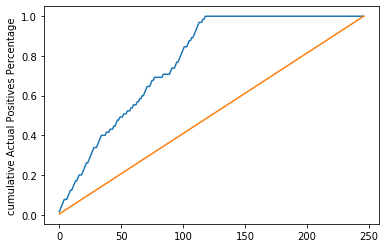

In [272]:
import matplotlib.pyplot as plt
plt.plot(df_result["Cumulative_Positives_percent"].values.tolist())
plt.plot(df_result["Cumulative_Count"].values.tolist())
plt.ylabel('cumulative Actual Positives Percentage')

plt.show()